In [1]:
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime

## Case Study: 2014-04-27

### Loading the time and origins of the dust events

In [2]:
df = pd.read_csv('Dust_LatLon_Drobo_Complete_June2022_Jesse - Data LatLon.csv')

In [3]:
df_case = df[df["Date (YYYYMMDD)"] == 20140427.0]

In [4]:
df_case

,Date (YYYYMMDD),YYYY,M,D,latitude,longitude,start time (UTC),Jesse Check,Notes,New GOES Notes,Julian day,GOES Raw,GOES Images,Unnamed: 13,Unnamed: 14,Unnamed: 15
1696,20140427.0,2014.0,4.0,27.0,37.9,-101.9,1630.0,x,SWIRD,NE,NaN,NaN,NaN,NaN,NaN,NaN
1697,20140427.0,2014.0,4.0,27.0,36.2,-101.5,1600.0,x,NaN,Northern Panhandle TX,14117.0,NaN,NaN,NaN,NaN,NaN
1698,20140427.0,2014.0,4.0,27.0,34.9,-103.2,1530.0,x,NaN,Eastern NM,NaN,NaN,NaN,NaN,NaN,NaN
1699,20140427.0,2014.0,4.0,27.0,33.8,-103.0,1600.0,x,NaN,Western TX,NaN,NaN,NaN,NaN,NaN,NaN
1700,20140427.0,2014.0,4.0,27.0,32.6,-106.2,1630.0,x,NaN,Western TX,NaN,NaN,NaN,NaN,NaN,NaN
1701,20140427.0,2014.0,4.0,27.0,32.0,-103.5,1630.0,x,NaN,Southeastern NM,NaN,NaN,NaN,NaN,NaN,NaN
1702,20140427.0,2014.0,4.0,27.0,31.5,-107.5,1600.0,x,NaN,Northern CHH,NaN,NaN,NaN,NaN,NaN,NaN


### Creating the NARR map for the case study

Data collected from the table here: https://psl.noaa.gov/data/gridded/data.narr.html
* hgt: Geopotential Height, 8x daily

In [5]:
hgt_ds = xr.open_dataset('hgt.201404.nc')

/home/jturner/miniconda3/lib/python3.9/site-packages/xarray/conventions.py:492: SerializationWarning: variable 'hgt' has multiple fill values {9.96921e+36, -9.96921e+36}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [6]:
hgt_ds

<xarray.Dataset>
Dimensions:            (level: 29, time: 240, x: 349, y: 277)
Coordinates:
  * time               (time) datetime64[ns] 2014-04-01 ... 2014-04-30T21:00:00
  * level              (level) float32 1000.0 975.0 950.0 ... 150.0 125.0 100.0
    lat                (y, x) float32 ...
    lon                (y, x) float32 ...
  * y                  (y) float32 0.0 32463.0 64926.0 ... 8927325.0 8959788.0
  * x                  (x) float32 0.0 32463.0 64926.0 ... 11264660.0 11297120.0
Data variables:
    Lambert_Conformal  int32 ...
    hgt                (time, level, y, x) float32 ...
Attributes:
    Conventions:    CF-1.2
    centerlat:      50.0
    centerlon:      -107.0
    institution:    National Centers for Environmental Prediction
    latcorners:     [ 1.000001  0.897945 46.3544   46.63433 ]
    loncorners:     [-145.5       -68.32005    -2.569891  148.6418  ]
    platform:       Model
    standardpar1:   50.0
    standardpar2:   50.000001
    title:          8x Daily NARR
    comments:       recreated Thu Nov 26 06:28:05 MST 2015 by NOAA/ESRL/PSD a...
    history:        created Thu Nov 26 06:28:05 MST 2015 by NOAA/ESRL/PSD
    dataset_title:  NCEP North American Regional Reanalysis (NARR)
    references:     https://www.esrl.noaa.gov/psd/data/gridded/data.narr.html
    source:         http://www.emc.ncep.noaa.gov/mmb/rreanl/index.html
    References:

In [7]:
level = 500  #hPa
dt = datetime(2014, 4, 27, 0, 0, 0, 0) 

hgt_ds_sel = hgt_ds.sel(level=level, time=dt)

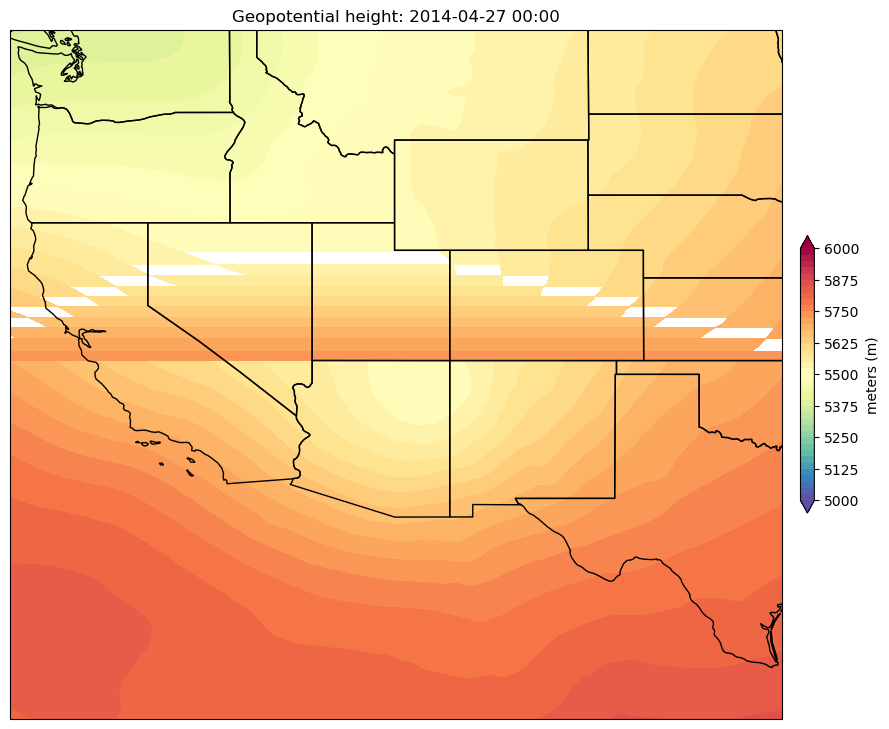

In [8]:
projection=ccrs.PlateCarree()
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})
cmap = plt.cm.Spectral_r
levels = np.linspace(5000, 6000, 41)

ax.set_extent([-125, -97, 24, 49], crs=ccrs.PlateCarree())
c=ax.contourf(hgt_ds_sel.lon, hgt_ds_sel.lat, hgt_ds_sel.hgt, cmap=cmap, levels=levels, extend='both')
clb=plt.colorbar(c, shrink=0.3, pad=0.02, ax=ax)

formatted_dt = dt.strftime('%Y-%m-%d %H:%M')
ax.set_title('Geopotential height: '+formatted_dt)
clb.set_label('meters (m)')


ax.add_feature(cfeature.STATES)